
## CNN (Evrisimli sinir aglari) -> convolutional neural networks 

##### ilk olarak 80 li yillarin sonunda sahte imza ve sahte senet gibi sorunlari cozmek icin kullanilan bir yapay sinir agi modelidir
##### Bir modelin CNN olarak adlandirilmasi icin gerekli katmanlar =(Convolution) ya da erisim islemi ve ortaklama-havuzlama islemi (pooling)
##### YSA'da ogrenmeyi saglayan iki islem vardi. arka arkaya gerceklesen ve ikisi bittiginde bir islem ya da bir iterasyon icin ogrenmesini gerceklestirdigi varsayiyorduk. Bunlar sadece carpma ve toplama isleminin yapildigi Feed Forward ve hatanin geriye yayilarak agirliklarin guncellenmesini saglayan BackPropagation adimlariydi.


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# import MNIST Dataset from keras

(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# veri on isleme step - 1 reshape
x_train = x_train.reshape(-1,28,28,1)  # goruntunun toplam sayisi   -28 e 28 tek kanalli
x_test = x_test.reshape(-1,28,28,1)  # goruntunun toplam sayisi   -28 e 28 tek kanalli

# veri on isleme step - 2 normalize
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

print(f'Egitim(train) verilerin sayisi ve boyutu = {x_train.shape}')
print(f'Test verilerin sayisi ve boyutu = {x_test.shape}')

Egitim(train) verilerin sayisi ve boyutu = (60000, 28, 28, 1)
Test verilerin sayisi ve boyutu = (10000, 28, 28, 1)


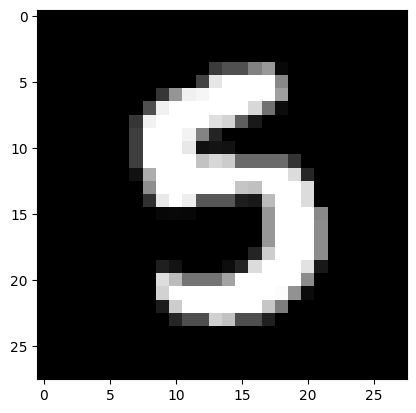

In [4]:
# Cikis verisi olarak bu girdi goruntulerinin hangi rakami temsil ettigini gosteren y verilerini duzenleyelim

plt.imshow(x_train[52314],cmap='gray')

In [5]:
# One-hot encoding
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
# egitim verilerinin %20'sinin dogrulama (Validation) verisi olarak ayrilmasi
# bu isleme data-split islemi denilir
# sklearn altindaki train test split fonksiyonu ile yapilir 

X_train,X_val,y_train_split,y_val= train_test_split(
    x_train,y_train,
    test_size=.2,
    random_state=42,
    stratify=y_train #rastgele dagilim yaparken sinif dengelenmesini korur
)
    

In [8]:
## CNN tabanli yapay zeka modelinin olusturulmasi 

model = keras.Sequential([
    ## CNN ilk blok
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    
    ## CNN ikinci blok
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
        
    ## Yapay sinir agini tanimliyoruz
    keras.layers.Flatten(), # duzlestirme islemi
    keras.layers.Dense(512,activation='relu'), # 512 noron
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.5),
    keras.layers.Dense(10,activation= 'softmax') # softmax coklu siniflandirma problemlerinde cok kullanilir
    
])

In [9]:
# Modeli derliyoruz
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
'''
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "mnist_classification_cnn_model.weights.h5",
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,  # Ağırlıkları kaydetmek için
    mode='max',
    verbose=1
)
'''


'\nmodel_checkpoint = keras.callbacks.ModelCheckpoint(\n    "mnist_classification_cnn_model.weights.h5",\n    monitor=\'val_accuracy\',\n    save_best_only=True,\n    save_weights_only=True,  # Ağırlıkları kaydetmek için\n    mode=\'max\',\n    verbose=1\n)\n'

In [11]:
my_model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "mnist_classification_cnn_model.keras",
    monitor = 'val_accuracy',
    save_best_only = True,
    mode = 'max',
    verbose=1
)

In [12]:

with tf.device('/GPU:0'):
    history = model.fit(X_train,y_train_split,validation_data=(X_val,y_val),
                   batch_size=128,epochs=10,callbacks=my_model_checkpoint
                   )

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.1991 - accuracy: 0.9400
Epoch 1: val_accuracy improved from -inf to 0.15633, saving model to mnist_classification_cnn_model.keras
375/375 [==============================] - 38s 100ms/step - loss: 0.1991 - accuracy: 0.9400 - val_loss: 6.7556 - val_accuracy: 0.1563
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0692 - accuracy: 0.9778
Epoch 2: val_accuracy improved from 0.15633 to 0.98783, saving model to mnist_classification_cnn_model.keras
375/375 [==============================] - 39s 104ms/step - loss: 0.0692 - accuracy: 0.9778 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.9849
Epoch 3: val_accuracy improved from 0.98783 to 0.98942, saving model to mnist_classification_cnn_model.keras
375/375 [==============================] - 39s 103ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0338 - val_acc

In [13]:
print ('Test islemi icin degerlendirme yapiliyor ...')

test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f'modelin loss degeri {test_loss}')
print(f'modelin Accuracy degeri  {test_accuracy}')

Test islemi icin degerlendirme yapiliyor ...
313/313 [==============================] - 3s 10ms/step - loss: 0.0259 - accuracy: 0.9923
modelin loss degeri 0.025885779410600662
modelin Accuracy degeri  0.9922999739646912


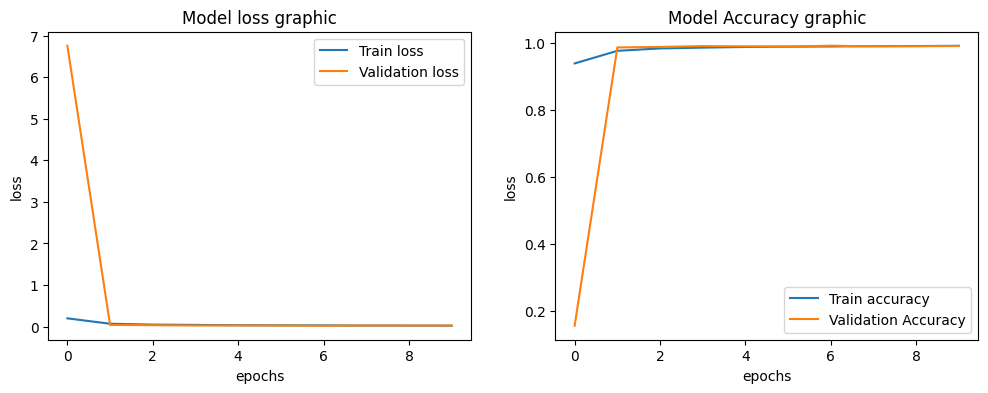

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label= 'Train loss')
plt.plot(history.history['val_loss'],label= 'Validation loss')
plt.title('Model loss graphic')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label= 'Train accuracy')
plt.plot(history.history['val_accuracy'],label= 'Validation Accuracy')
plt.title('Model Accuracy graphic')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns

#predict islemi ile x_test verilerini tahmin edecegiz
y_perd = model.predict(x_test)

y_pred_classes = np.argmax(y_perd,axis = 1)
y_test_classes = np.argmax(y_test,axis = 1)


313/313 [==============================] - 3s 9ms/step


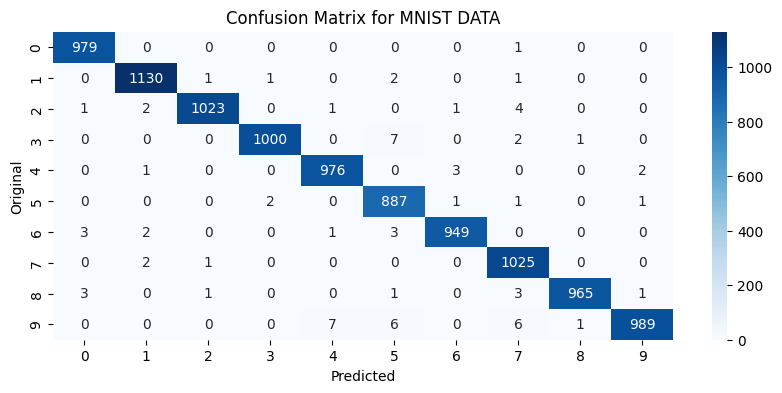

In [19]:
cm = confusion_matrix(y_test_classes,y_pred_classes)

plt.figure(figsize=(10,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix for MNIST DATA')
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.show()